# EDA | Chinook Music Store

The Chinook music store contains information about the artists, songs, and albums, as well as information on the shop's employees, customers, and the customers purchases. In this project, I will use Exploratory Data Analysis (EDA) with the use of summary statistics and graphical representations, refers to the crucial process of completing early investigations on data in order to uncover patterns, spot anomalies, test hypotheses, and check assumptions. I'll assist the Chinook team in understanding the media in their shop, their customers and employees, and their invoice information.

In [1]:
#Import libraries
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 

In [2]:
#Database Connection
#Reference: https://github.com/lerocha/chinook-database
Database = "Chinook_Sqlite.sqlite"
conn = sqlite3.connect(Database)
#conn.close()

## Explore the Database

In [3]:
table = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(table)

             name
0           Album
1          Artist
2        Customer
3        Employee
4           Genre
5         Invoice
6     InvoiceLine
7       MediaType
8        Playlist
9   PlaylistTrack
10          Track


In [4]:
c = conn.cursor()
def table_info(c, conn):
    '''
    prints out all of the columns of every table in db
    c : cursor object
    conn : database connection object
    '''
    tables = c.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
    for table_name in tables:
        table_name = table_name[0] 
        table = pd.read_sql_query("SELECT * from {} LIMIT 0".format(table_name), conn)
        print(table_name)
        for col in table.columns:
            print('\t' + col)
        print()

table_info(c, conn)

Album
	AlbumId
	Title
	ArtistId

Artist
	ArtistId
	Name

Customer
	CustomerId
	FirstName
	LastName
	Company
	Address
	City
	State
	Country
	PostalCode
	Phone
	Fax
	Email
	SupportRepId

Employee
	EmployeeId
	LastName
	FirstName
	Title
	ReportsTo
	BirthDate
	HireDate
	Address
	City
	State
	Country
	PostalCode
	Phone
	Fax
	Email

Genre
	GenreId
	Name

Invoice
	InvoiceId
	CustomerId
	InvoiceDate
	BillingAddress
	BillingCity
	BillingState
	BillingCountry
	BillingPostalCode
	Total

InvoiceLine
	InvoiceLineId
	InvoiceId
	TrackId
	UnitPrice
	Quantity

MediaType
	MediaTypeId
	Name

Playlist
	PlaylistId
	Name

PlaylistTrack
	PlaylistId
	TrackId

Track
	TrackId
	Name
	AlbumId
	MediaTypeId
	GenreId
	Composer
	Milliseconds
	Bytes
	UnitPrice



### 1 | Album Table

Albums table stores data about a list of tracks. Each album belongs to one artist. However, one artist may have multiple albums.

In [5]:
album_data = pd.read_sql(
    
'''
SELECT * FROM Album;
    
'''
    
, conn)

print('Dimensions of the data:\n', album_data.shape,'\n\n')
print('Summary of the data:')
print(album_data.info(), '\n\n')
print('View a small sample of the data:\n')
print('Check the Null values:\n', album_data.isnull().sum(),'\n\n')
print('Check the Duplication values:', album_data.duplicated().sum(),'\n\n')
print('View a small sample of the data:\n')
album_data.head(5)

Dimensions of the data:
 (347, 3) 


Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AlbumId   347 non-null    int64 
 1   Title     347 non-null    object
 2   ArtistId  347 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.3+ KB
None 


View a small sample of the data:

Check the Null values:
 AlbumId     0
Title       0
ArtistId    0
dtype: int64 


Check the Duplication values: 0 


View a small sample of the data:



,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


### 2 | Artist Table

Artists table stores artists data. It is a simple table that contains only the artist id and name.

In [6]:
artist_data = pd.read_sql(
    
'''
SELECT * FROM Artist;
    
'''
    
, conn)

print('Dimensions of the data:\n', artist_data.shape,'\n\n')
print('Summary of the data:')
print(artist_data.info(), '\n\n')
print('View a small sample of the data:\n')
print('Check the Null values:\n', artist_data.isnull().sum(),'\n\n')
print('Check the Duplication values:', artist_data.duplicated().sum(),'\n\n')
print('View a small sample of the data:\n')
artist_data.head(5)

Dimensions of the data:
 (275, 2) 


Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ArtistId  275 non-null    int64 
 1   Name      275 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB
None 


View a small sample of the data:

Check the Null values:
 ArtistId    0
Name        0
dtype: int64 


Check the Duplication values: 0 


View a small sample of the data:



,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


### 3 | Customer Table

Customers table stores customers data.

In [7]:
customer_data = pd.read_sql(
    
'''
SELECT * FROM Customer;
    
'''
    
, conn)

print('Dimensions of the data:\n', customer_data.shape,'\n\n')
print('Summary of the data:')
print(customer_data.info(), '\n\n')
print('View a small sample of the data:\n')
print('Check the Null values:\n', customer_data.isnull().sum(),'\n\n')
print('Check the Duplication values:', customer_data.duplicated().sum(),'\n\n')
print('View a small sample of the data:\n')
customer_data.head(5)

Dimensions of the data:
 (59, 13) 


Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerId    59 non-null     int64 
 1   FirstName     59 non-null     object
 2   LastName      59 non-null     object
 3   Company       10 non-null     object
 4   Address       59 non-null     object
 5   City          59 non-null     object
 6   State         30 non-null     object
 7   Country       59 non-null     object
 8   PostalCode    55 non-null     object
 9   Phone         58 non-null     object
 10  Fax           12 non-null     object
 11  Email         59 non-null     object
 12  SupportRepId  59 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.1+ KB
None 


View a small sample of the data:

Check the Null values:
 CustomerId       0
FirstName        0
LastName         0
Company         49
Address         

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


### 4 | Employee Table

Employees table stores employees data such as employee id, last name, first name, etc. It also has a field named ReportsTo to specify who reports to whom.

In [8]:
employee_data = pd.read_sql(
    
'''
SELECT * FROM Employee;
    
'''
    
, conn)

print('Dimensions of the data:\n', employee_data.shape,'\n\n')
print('Summary of the data:')
print(employee_data.info(), '\n\n')
print('View a small sample of the data:\n')
print('Check the Null values:\n', employee_data.isnull().sum(),'\n\n')
print('Check the Duplication values:', employee_data.duplicated().sum(),'\n\n')
print('View a small sample of the data:\n')
employee_data.head(5)

Dimensions of the data:
 (8, 15) 


Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EmployeeId  8 non-null      int64  
 1   LastName    8 non-null      object 
 2   FirstName   8 non-null      object 
 3   Title       8 non-null      object 
 4   ReportsTo   7 non-null      float64
 5   BirthDate   8 non-null      object 
 6   HireDate    8 non-null      object 
 7   Address     8 non-null      object 
 8   City        8 non-null      object 
 9   State       8 non-null      object 
 10  Country     8 non-null      object 
 11  PostalCode  8 non-null      object 
 12  Phone       8 non-null      object 
 13  Fax         8 non-null      object 
 14  Email       8 non-null      object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.1+ KB
None 


View a small sample of the data:

Check the Null values:
 EmployeeId    0


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


### 5 | Genre Table

Genres table stores music types such as rock, jazz, metal, etc.

In [9]:
genre_data = pd.read_sql(
    
'''
SELECT * FROM Genre;
    
'''
    
, conn)

print('Dimensions of the data:\n', genre_data.shape,'\n\n')
print('Summary of the data:')
print(genre_data.info(), '\n\n')
print('View a small sample of the data:\n')
print('Check the Null values:\n', genre_data.isnull().sum(),'\n\n')
print('Check the Duplication values:', genre_data.duplicated().sum(),'\n\n')
print('View a small sample of the data:\n')
genre_data.head(5)

Dimensions of the data:
 (25, 2) 


Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   GenreId  25 non-null     int64 
 1   Name     25 non-null     object
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes
None 


View a small sample of the data:

Check the Null values:
 GenreId    0
Name       0
dtype: int64 


Check the Duplication values: 0 


View a small sample of the data:



,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


### 6 | Invoice Table

Invoices & InvoiceLine tables: these two tables store invoice data. The invoices table stores invoice header data and the invoiceLine table stores the invoice line items data.

In [10]:
invoice_data = pd.read_sql(
    
'''
SELECT * FROM Invoice;
    
'''
    
, conn)

print('Dimensions of the data:\n', invoice_data.shape,'\n\n')
print('Summary of the data:')
print(invoice_data.info(), '\n\n')
print('View a small sample of the data:\n')
print('Check the Null values:\n', invoice_data.isnull().sum(),'\n\n')
print('Check the Duplication values:', invoice_data.duplicated().sum(),'\n\n')
print('View a small sample of the data:\n')
invoice_data.head(5)

Dimensions of the data:
 (412, 9) 


Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceId          412 non-null    int64  
 1   CustomerId         412 non-null    int64  
 2   InvoiceDate        412 non-null    object 
 3   BillingAddress     412 non-null    object 
 4   BillingCity        412 non-null    object 
 5   BillingState       210 non-null    object 
 6   BillingCountry     412 non-null    object 
 7   BillingPostalCode  384 non-null    object 
 8   Total              412 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 29.1+ KB
None 


View a small sample of the data:

Check the Null values:
 InvoiceId              0
CustomerId             0
InvoiceDate            0
BillingAddress         0
BillingCity            0
BillingState         202
BillingCountry         0
Billin

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86


### 7 | InvoiceLine Table

In [11]:
invoiceLine_data = pd.read_sql(
    
'''
SELECT * FROM InvoiceLine;
    
'''
    
, conn)

print('Dimensions of the data:\n', invoiceLine_data.shape,'\n\n')
print('Summary of the data:')
print(invoiceLine_data.info(), '\n\n')
print('View a small sample of the data:\n')
print('Check the Null values:\n', invoiceLine_data.isnull().sum(),'\n\n')
print('Check the Duplication values:', invoiceLine_data.duplicated().sum(),'\n\n')
print('View a small sample of the data:\n')
invoiceLine_data.head(5)

Dimensions of the data:
 (2240, 5) 


Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceLineId  2240 non-null   int64  
 1   InvoiceId      2240 non-null   int64  
 2   TrackId        2240 non-null   int64  
 3   UnitPrice      2240 non-null   float64
 4   Quantity       2240 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 87.6 KB
None 


View a small sample of the data:

Check the Null values:
 InvoiceLineId    0
InvoiceId        0
TrackId          0
UnitPrice        0
Quantity         0
dtype: int64 


Check the Duplication values: 0 


View a small sample of the data:



,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1


### 8 | MediaType Table

Media type table stores media types such as MPEG audio and AAC audio files.

In [12]:
mediaType_data = pd.read_sql(
    
'''
SELECT * FROM MediaType;
    
'''
    
, conn)

print('Dimensions of the data:\n', mediaType_data.shape,'\n\n')
print('Summary of the data:')
print(mediaType_data.info(), '\n\n')
print('View a small sample of the data:\n')
print('Check the Null values:\n', mediaType_data.isnull().sum(),'\n\n')
print('Check the Duplication values:', mediaType_data.duplicated().sum(),'\n\n')
print('View a small sample of the data:\n')
mediaType_data.head(5)

Dimensions of the data:
 (5, 2) 


Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MediaTypeId  5 non-null      int64 
 1   Name         5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes
None 


View a small sample of the data:

Check the Null values:
 MediaTypeId    0
Name           0
dtype: int64 


Check the Duplication values: 0 


View a small sample of the data:



,MediaTypeId,Name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


### 9 | Playlist Table 

Playlists & PlaylistTrack tables: playlists table store data about playlists. Each playlist contains a list of tracks. Each track may belong to multiple playlists. The relationship between the playlists table and tracks table is many-to-many. The playlistTrack table is used to reflect this relationship.

In [13]:
playlist_data = pd.read_sql(
    
'''
SELECT * FROM Playlist;
    
'''
    
, conn)

print('Dimensions of the data:\n', playlist_data.shape,'\n\n')
print('Summary of the data:')
print(playlist_data.info(), '\n\n')
print('View a small sample of the data:\n')
print('Check the Null values:\n', playlist_data.isnull().sum(),'\n\n')
print('Check the Duplication values:', playlist_data.duplicated().sum(),'\n\n')
print('View a small sample of the data:\n')
playlist_data.head(5)

Dimensions of the data:
 (18, 2) 


Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PlaylistId  18 non-null     int64 
 1   Name        18 non-null     object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes
None 


View a small sample of the data:

Check the Null values:
 PlaylistId    0
Name          0
dtype: int64 


Check the Duplication values: 0 


View a small sample of the data:



,PlaylistId,Name
0,1,Music
1,2,Movies
2,3,TV Shows
3,4,Audiobooks
4,5,90’s Music


### 10 | PlaylistTrack Table

In [14]:
playlistTrack_data = pd.read_sql(
    
'''
SELECT * FROM PlaylistTrack;
    
'''
    
, conn)

print('Dimensions of the data:\n', playlistTrack_data.shape,'\n\n')
print('Summary of the data:')
print(playlistTrack_data.info(), '\n\n')
print('View a small sample of the data:\n')
print('Check the Null values:\n', playlistTrack_data.isnull().sum(),'\n\n')
print('Check the Duplication values:', playlistTrack_data.duplicated().sum(),'\n\n')
print('View a small sample of the data:\n')
playlistTrack_data.head(5)

Dimensions of the data:
 (8715, 2) 


Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8715 entries, 0 to 8714
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   PlaylistId  8715 non-null   int64
 1   TrackId     8715 non-null   int64
dtypes: int64(2)
memory usage: 136.3 KB
None 


View a small sample of the data:

Check the Null values:
 PlaylistId    0
TrackId       0
dtype: int64 


Check the Duplication values: 0 


View a small sample of the data:



,PlaylistId,TrackId
0,1,3402
1,1,3389
2,1,3390
3,1,3391
4,1,3392


### 11 | Track Table

Tracks table stores the data of songs. Each track belongs to one album.

In [15]:
track_data = pd.read_sql(
    
'''
SELECT * FROM Track;
    
'''
    
, conn)

print('Dimensions of the data:\n', track_data.shape,'\n\n')
print('Summary of the data:')
print(track_data.info(), '\n\n')
print('View a small sample of the data:\n')
print('Check the Null values:\n', track_data.isnull().sum(),'\n\n')
print('Check the Duplication values:', track_data.duplicated().sum(),'\n\n')
print('View a small sample of the data:\n')
track_data.head(5)

Dimensions of the data:
 (3503, 9) 


Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TrackId       3503 non-null   int64  
 1   Name          3503 non-null   object 
 2   AlbumId       3503 non-null   int64  
 3   MediaTypeId   3503 non-null   int64  
 4   GenreId       3503 non-null   int64  
 5   Composer      2525 non-null   object 
 6   Milliseconds  3503 non-null   int64  
 7   Bytes         3503 non-null   int64  
 8   UnitPrice     3503 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 246.4+ KB
None 


View a small sample of the data:

Check the Null values:
 TrackId           0
Name              0
AlbumId           0
MediaTypeId       0
GenreId           0
Composer        978
Milliseconds      0
Bytes             0
UnitPrice         0
dtype: int64 


Check the Duplication values: 0 


V

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


# 

# Visualization Section 

### Songs per genre

In [16]:
songs = pd.read_sql(
    
'''
SELECT G.NAME,
COUNT(T.TRACKID) AS COUNT
FROM TRACK T
JOIN GENRE G ON T.GENREID = G.GENREID
GROUP BY 1
ORDER BY 2 DESC    
'''
    
, conn)

songs


,Name,COUNT
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


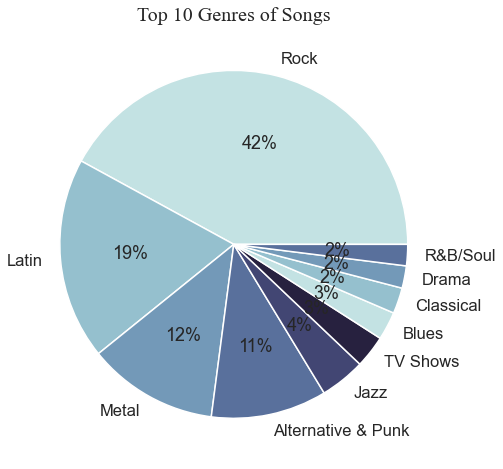

In [17]:
plt.figure(figsize=[8,8])
plt.title('Top 10 Genres of Songs',fontsize=20,family='Times New Roman')
colors = sns.color_palette("ch:start=.2,rot=-.3")
sns.set_style("white")
sns.set_context("talk")
plt.pie('COUNT', labels='Name', colors = colors, autopct='%.0f%%', data = songs[:10])
plt.show()

### Employee Sales 

In [18]:
employeeSales = pd.read_sql(
    
'''

SELECT
  strftime('%Y-%m',e.hiredate) hire_date,
  e.firstname|| ' ' ||e.lastname Employee_Name,
  COUNT(i.invoiceid) number_of_sale,
  ROUND(SUM(i.total), 2) value_of_sale
FROM employee e
JOIN customer c
  ON c.supportrepid = e.employeeid
JOIN invoice i
  ON i.customerid = c.customerid
WHERE title = 'Sales Support Agent'
GROUP BY 1,
         2

'''

, conn)

employeeSales


,hire_date,Employee_Name,number_of_sale,value_of_sale
0,2002-04,Jane Peacock,146,833.04
1,2003-05,Margaret Park,140,775.40
2,2003-10,Steve Johnson,126,720.16


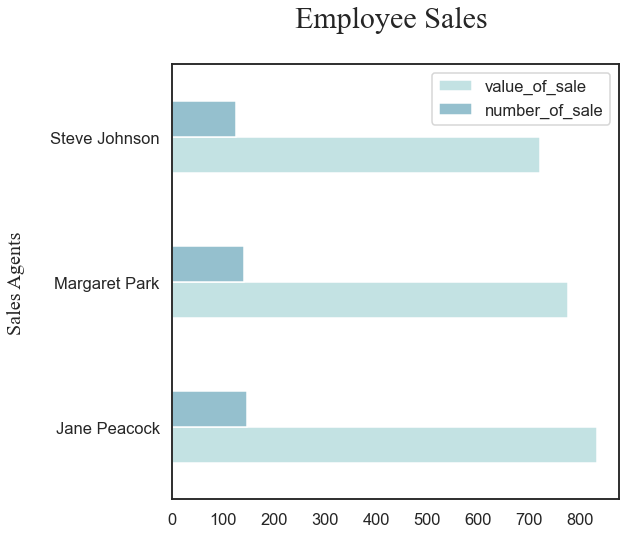

In [19]:
with sns.color_palette("ch:start=.2,rot=-.3"):
    employee_Sales=pd.DataFrame(employeeSales,columns=["hire_date","Employee_Name","number_of_sale","value_of_sale"])
    sns.set_style("white")
    sns.set_context("talk")
    employee_Sales.plot(x="Employee_Name", y=["value_of_sale", "number_of_sale"],kind="barh",figsize=(8,8))
    plt.ylabel("Sales Agents\n",fontsize=20,family='Times New Roman')
    plt.title('Employee Sales \n',fontsize=30,family='Times New Roman');
    plt.legend(loc="upper right",bbox_to_anchor=(1,1))


### Countries with the most customers

In [20]:
countryInvoices = pd.read_sql(
    
'''
SELECT BillingCountry,
COUNT(INVOICEID) AS Invoiced
FROM Invoice
GROUP BY 1
ORDER BY 2 DESC
    
'''
    
, conn)

df_countryInvoices = countryInvoices.head(10)
df_countryInvoices#.head(10)

,BillingCountry,Invoiced
0,USA,91
1,Canada,56
2,France,35
3,Brazil,35
4,Germany,28
5,United Kingdom,21
6,Portugal,14
7,Czech Republic,14
8,India,13
9,Sweden,7


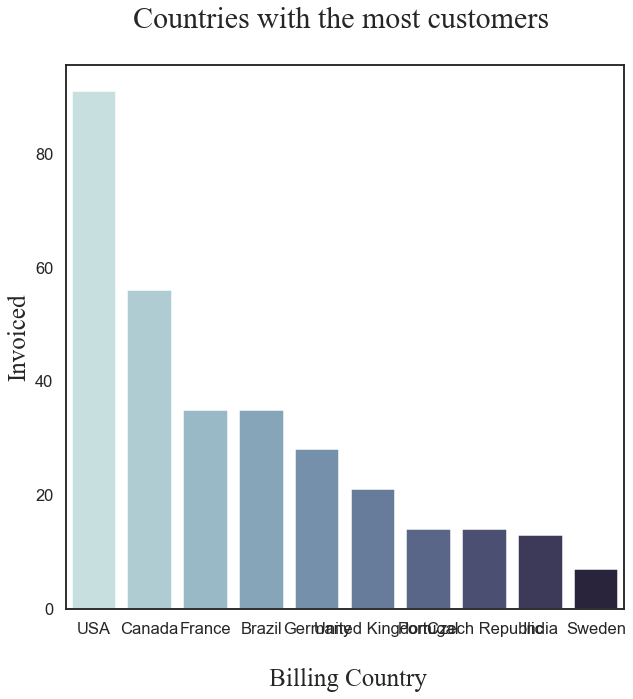

In [21]:
plt.figure(figsize=[10,10])
sns.barplot(x='BillingCountry',y='Invoiced', palette="ch:start=.2,rot=-.3", data=df_countryInvoices)
sns.set_style("white")
sns.set_context("talk")
plt.xlabel("\n Billing Country",fontsize=25,family='Times New Roman')
plt.ylabel("Invoiced",fontsize=25,family='Times New Roman')
plt.title('Countries with the most customers \n',fontsize=30,family='Times New Roman');

### The artist has the highest sales

In [22]:
artistInvoice = pd.read_sql(
    
'''

SELECT Y.NAME AS ARTIST_NAME,
SUM(TOTAL) AS Grand_Total
FROM
(SELECT X.NAME,
X.UNITPRICE * X.QUANTITY AS TOTAL
FROM
(SELECT   AR.NAME,
IL.UNITPRICE,
IL.QUANTITY
FROM ARTIST AR
JOIN ALBUM AL ON AR.ARTISTID = AL.ARTISTID
JOIN TRACK T ON AL.ALBUMID = T.ALBUMID
JOIN INVOICELINE IL ON T.TRACKID = IL.TRACKID
ORDER BY 1 DESC) AS X) AS Y
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10


'''

, conn)

artistInvoice

,ARTIST_NAME,Grand_Total
0,Iron Maiden,138.60
1,U2,105.93
2,Metallica,90.09
3,Led Zeppelin,86.13
4,Lost,81.59
5,The Office,49.75
6,Os Paralamas Do Sucesso,44.55
7,Deep Purple,43.56
8,Faith No More,41.58
9,Eric Clapton,39.60


### The customer with the highest purchases

In [23]:
customerInvoice = pd.read_sql(
    
'''

SELECT C.CUSTOMERID,
C.FIRSTNAME || ' ' || C.LASTNAME AS Custome_Name,
SUM(I.TOTAL)
FROM CUSTOMER C
JOIN INVOICE I ON C.CUSTOMERID = I.CUSTOMERID
GROUP BY 1
ORDER BY 3 DESC
LIMIT 5

'''

, conn)

customerInvoice

,CustomerId,Custome_Name,SUM(I.TOTAL)
0,6,Helena Holý,49.62
1,26,Richard Cunningham,47.62
2,57,Luis Rojas,46.62
3,45,Ladislav Kovács,45.62
4,46,Hugh O'Reilly,45.62
